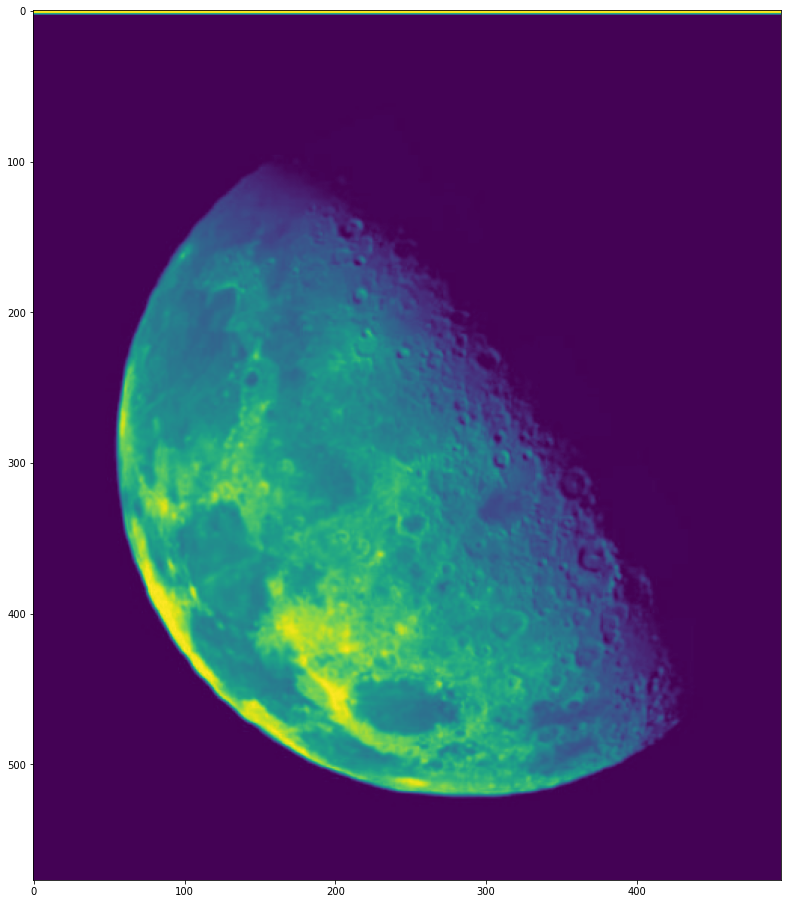

In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 16]

A = imread("D:\\Download D\\personals\\moon.jpg")

B = np.mean(A, -1); # Convert RGB to grayscale
plt.imshow(B)


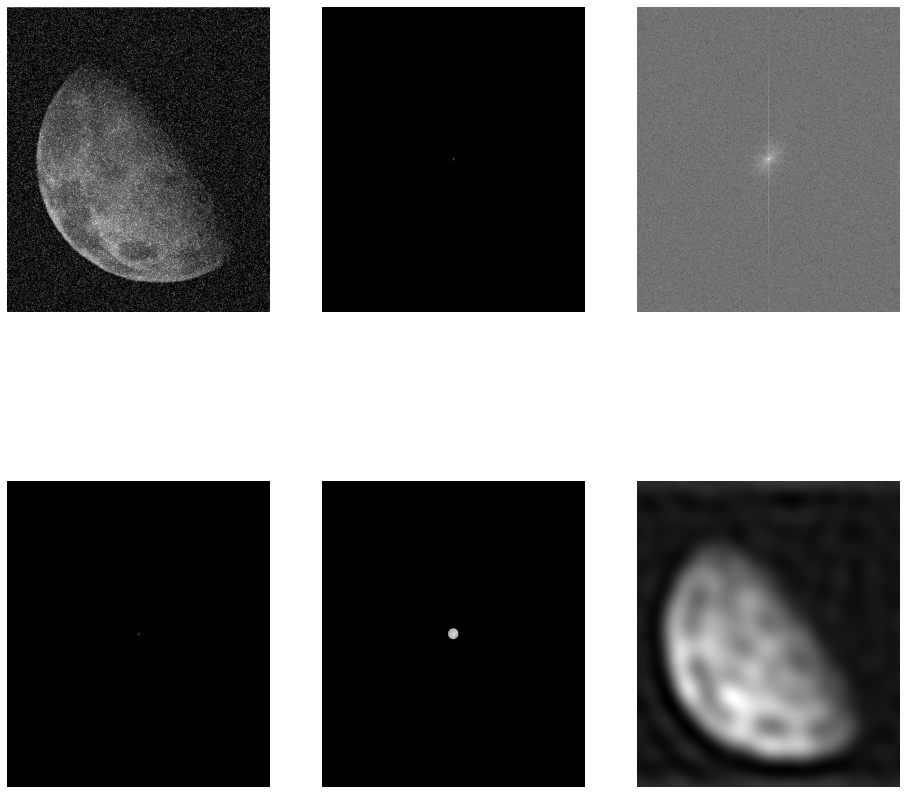

In [2]:
## filtering
Bnoise = B + 200*np.random.randn(*B.shape).astype('uint8') # Add some noise
Bt = np.fft.fft2(Bnoise)
Btshift = np.fft.fftshift(Bt)
F = np.log(np.abs(Btshift)+1) # Put FFT on log scale

fig,axs = plt.subplots(2,3)

axs[0,0].imshow(Bnoise,cmap='gray')
axs[0,0].axis('off')

axs[0,1].imshow(abs(Btshift),cmap='gray')
axs[0,1].axis('off')

axs[0,2].imshow(F,cmap='gray')
axs[0,2].axis('off')

nx,ny = B.shape
X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))
xc=0
yc=0
R = np.power(X-xc,2) + np.power(Y-yc,2)
mask = R <= 210**2
Btshiftfilt = Btshift * mask
Ffilt = np.log(np.abs(Btshiftfilt)+1) # Put FFT on log scale

axs[1,0].imshow(abs(Btshiftfilt),cmap='gray')
axs[1,0].axis('off')

axs[1,1].imshow(Ffilt,cmap='gray')
axs[1,1].axis('off')

Btfilt = np.fft.ifftshift(Btshiftfilt)
Bfilt = np.fft.ifft2(Btfilt).real

axs[1,2].imshow(Bfilt,cmap='gray')
axs[1,2].axis('off')

plt.show()
